<div align='center'>

# Resolução da Lista 3
### complemento, calculos e solução das equações
---
<small> 
    William Henrique - 119111128 

    15 de fevereiro de 2022
</small>

---
</div>

In [2]:
from sympy import *
from sympy.plotting import plot
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# matrícula (1,2,8)
x = 1 + 1
y = 1 + 2
z = 1 + 8

#função para plotar gráficos
#exp: expresão
#r: intervalo
#step: passo
def myplot(exp, r=(0, 2), step = .005): 
    x = np.arange(r[0], r[1], step, dtype = np.float64)
    y1 = x.copy()

    for k, v in enumerate(x):
        y1[k] = exp.subs({t: x[k]})
    plt.plot(x, y1)

# Questão 1 - Calculos e Gráficos

## Questão 1 (A)

In [4]:

# indutâncias
L1 = 4e-3
L2 = 1e-3
L3 = 5e-3
# as expresões dadas das tensões na fonte

t = symbols("t")
v1 = -0.05*x*E**(-x*t)
v2 = -0.02*y*E**(-y*t)*cos(20*t)
v3 = +0.01*z*E**(-z*t)

Calculando $V_{L1}(t)$ e $I_{L1}(t)$

In [5]:
vl1 = -v3 - v1
il1 = 1/L1 * integrate(vl1, (t, 0, t))
il1

10.0 - 12.5*exp(-2*t) + 2.5*exp(-9*t)

Calculando $V_{L2}(t)$ e  $I_{L2}(t)$

In [6]:
vl2 = -v3 + v2
il2 = 1/L2 * integrate(vl2, (t, 0, t))
il2

-10.440097799511 - 2.93398533007335*exp(-3*t)*sin(20*t) + 0.440097799511002*exp(-3*t)*cos(20*t) + 10.0*exp(-9*t)

Calculando $V_{L3}(t)$ e $I_{L3}(t)$

In [7]:
vl3 = -v2 - v1
il3 = 1/L3 * integrate(vl3, (t, 0, t))
il3

10.0880195599022 - 10.0*exp(-2*t) + 0.58679706601467*exp(-3*t)*sin(20*t) - 0.0880195599022005*exp(-3*t)*cos(20*t)

## Questão 1 (B)

Calculando $p_{L1}(t)$

In [8]:
pl1 = vl1 * il1
pl1.simplify()

(0.1*exp(7*t) - 0.09)*(10.0*exp(9*t) - 12.5*exp(7*t) + 2.5)*exp(-18*t)

Calculando $p_{L2}(t)$

In [9]:
pl2 = vl2 * il2
pl2.simplify()

(0.06*exp(6*t)*cos(20*t) + 0.09)*((2.93398533007335*sin(20*t) - 0.440097799511002*cos(20*t))*exp(6*t) + 10.440097799511*exp(9*t) - 10.0)*exp(-18*t)

Calculando $p_{L3}(t)$

In [13]:
pl3 = vl3 * il3
pl3

(0.1*exp(-2*t) + 0.06*exp(-3*t)*cos(20*t))*(10.0880195599022 - 10.0*exp(-2*t) + 0.58679706601467*exp(-3*t)*sin(20*t) - 0.0880195599022005*exp(-3*t)*cos(20*t))

## Questão 1 (C)

Analisando os gráficos de potência

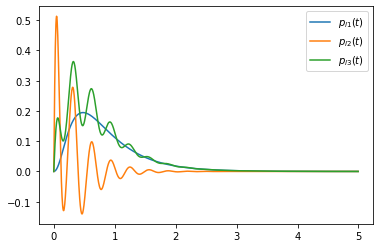

In [14]:
passo = 0.005
x = np.arange(0, 5, passo,  dtype = np.float64)
y1 = x.copy()
y2 = y1.copy()
y3 = y1.copy()

for k, v in enumerate(x):
    y1[k] = pl1.subs({t: x[k]})
    y2[k] = pl2.subs({t: x[k]})
    y3[k] = pl3.subs({t: x[k]})

plt.plot(x, y1, x, y2, x, y3)
plt.legend(("$p_{l1}(t)$", "$p_{l2}(t)$", "$p_{l3}(t)$"))

Pelo gráfico das potências nos indutores para $t>=0$, é possivel perceber que $p_{l2}(t)$ possui o maior pico de potência

raiz encontrada em t = 0.0461833530502532 s é um ponto de
máximo valor: 0.513314894192184 W


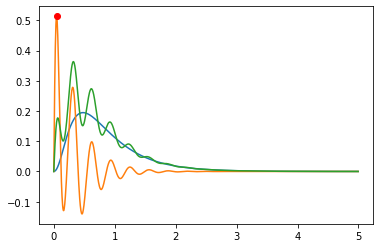

In [15]:
dpl2 = diff(pl2, t)
root = nsolve(dpl2, t, (0, .1), solve="bisect")
print(f"raiz encontrada em t = {root} s é um ponto de")
valor = pl2.subs({t:root})
if (valor > 0):
    print(f"máximo valor: {valor} W")
plt.plot(x, y1, x, y2, x, y3, root, pl2.subs({t: root}), 'or')

## Questão 1 (D)

$w(t) = \frac{L}{2}i(t)^2$

$W_{l1}(t = oo)$

In [201]:
# energia acumulada em t = +oo
wl1 = 1/2 * L1 * il1**2
wl1 = limit(wl1, t, oo)
wl1

$W_{l2}(t = oo)$

In [200]:
wl2 = 1/2 * L2 * il2**2
wl2 = limit(wl2, t, oo)
wl2

$W_{l3}(t = oo)$

In [199]:
wl3 = 1/2 * L3 * il3**2
wl3 = limit(wl3, t, oo)
wl3

In [202]:
wl1 + wl2 + wl3

0.508918167634101

# Questão 2 - Calculos e Gráficos

In [4]:
t = symbols("t")

## Questão 2 (A)

In [5]:
i = 500*E**(-z*t)*cos(20*t)*1e-3      # milli Ampere -> em Ampere
v1 = -2*E**(-y*t)                     # V
v2 = 5*t*E**(-x*t)                    # V
C = 500e-6   # C
L = 100e-3   # H

$v_L(t) = v_1(t) + v_2(t)$

In [6]:
vl = v1 + v2
vl

5*t*exp(-2*t) - 2*exp(-3*t)

$v_C(t) = C\int_{t_0}^{t}{i(\tau)d\tau} + v_o(t_0)$

In [7]:
#        v(t)                    + v(0)          
vc = 1/C * integrate(i, (t, 0, t)) + (-x)
vc

16.7110187110187 + 41.5800415800416*exp(-9*t)*sin(20*t) - 18.7110187110187*exp(-9*t)*cos(20*t)

## Questão 2 (B)

Aplicando L.K.T. na malha I (malha da esquerda)

In [8]:
vi = vl + v1 - vc
vi

5*t*exp(-2*t) - 16.7110187110187 - 4*exp(-3*t) - 41.5800415800416*exp(-9*t)*sin(20*t) + 18.7110187110187*exp(-9*t)*cos(20*t)

Logo, a potência na fonte de corrente

In [9]:
pi = -vi * i
pi

0.5*(-5*t*exp(-2*t) + 16.7110187110187 + 4*exp(-3*t) + 41.5800415800416*exp(-9*t)*sin(20*t) - 18.7110187110187*exp(-9*t)*cos(20*t))*exp(-9*t)*cos(20*t)

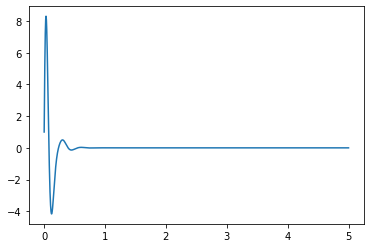

In [27]:
myplot(pi)

## Questão 2 (C)

Calculando $I_L(t)$

In [11]:
il = 1/L * integrate(vl, (t, 0, t)) + 0.1*y
il

0.833333333333333*(-30*t - 15)*exp(-2*t) + 6.13333333333333 + 6.66666666666667*exp(-3*t)

In [31]:
limit(il, t, oo) # il(t = oo)

6.13333333333333

$p_{v1}(t) = -v_1(t)*i_L(t)$

In [12]:
pv1 = - v1 * il
pv1

2*(0.833333333333333*(-30*t - 15)*exp(-2*t) + 6.13333333333333 + 6.66666666666667*exp(-3*t))*exp(-3*t)

$p_{v2}(t) = -v_2(t)[i_L(t) + i_C(t)]$ tal que $i_C(t) = i(t)$

In [13]:
pv2 = -v2 * (il + i)
pv2

-5*t*(0.833333333333333*(-30*t - 15)*exp(-2*t) + 6.13333333333333 + 6.66666666666667*exp(-3*t) + 0.5*exp(-9*t)*cos(20*t))*exp(-2*t)

A potência desenvolvida pelas fontes de tensão é $p_V = p_{v1} + p_{v2}$

In [14]:
pv = pv1 + pv2
pv

-5*t*(0.833333333333333*(-30*t - 15)*exp(-2*t) + 6.13333333333333 + 6.66666666666667*exp(-3*t) + 0.5*exp(-9*t)*cos(20*t))*exp(-2*t) + 2*(0.833333333333333*(-30*t - 15)*exp(-2*t) + 6.13333333333333 + 6.66666666666667*exp(-3*t))*exp(-3*t)

## Questão 2 (D)

A carga total desenvolvida pelo capacitor em t = oo

v_C(t = oo) -> 16,71 V

In [18]:
carga = limit(vc, t, oo)*C
print(f" carga = {carga} C = {carga*1e3} milliC") 

 carga = 0.00835550935550936 C = 8.35550935550936 milliC


Questão 2 (E)

A energia acumulada em t = oo pelo capacitor e pelo indutor

In [24]:
wl = 1/2 * L * il**2    #energia no indutor
wc = 1/2 * C * vc**2     #energia no capacitor

In [25]:
wl = limit(wl, t, oo) # energia armazena em t = oo pelo indutor
print(f"wc = {wl} J")


wc = 1.88088888888889 J


In [26]:
wc = limit(wc, t, oo) # energia armazenada em t = oo pelo capacitor
print(f"wc = {wc} J")

wc = 0.0698145365900044 J


In [27]:
# energia total armazena pelo indutor e pelo capacitor
print(f"wc + wl = {wc + wl} J")

wc + wl = 1.95070342547889 J


## Questão 2 (F)

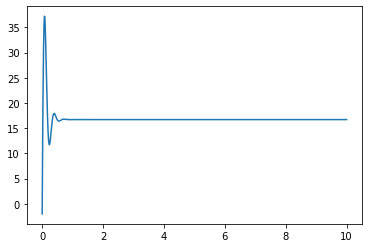

In [28]:
myplot(vc, r=(0, 10))

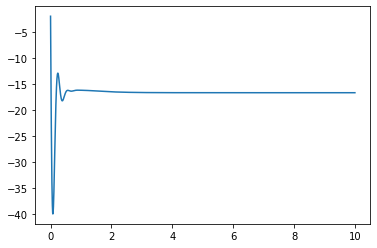

In [29]:
myplot(vi, r=(0, 10))

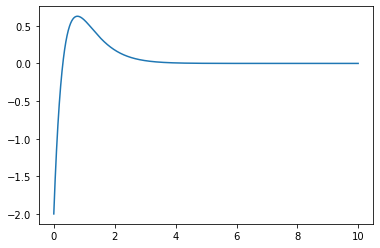

In [30]:
myplot(vl, r=(0, 10))
